# Data Preprocessing

In [ ]:
# import packages
from google.colab import drive

# for data manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# for plotting data
import seaborn as sns
import matplotlib.pyplot as plt

# for feature selection
from sklearn.feature_selection import VarianceThreshold, RFECV

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# for CNN
import torch
import torch.nn as nn
import torch.optim as optim

# evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# global variables
STATE = 42


## Load Data

In [ ]:
# mount drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# load dataset
# you may need to update this depending on where your folders/files are
# a quick way for me was to add the shared folder as a shortcut to my drive to get it to show up when mounting
filepath = '/content/drive/MyDrive/CPSC 544 Group/heart.csv'

data = pd.read_csv(filepath)
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# check data types + nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# check distribution of numerical features
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Encode and Scale Data

In [ ]:
# split data into features and label
features = data.drop('HeartDisease', axis=1)
label = data['HeartDisease']

# split features into numerical and categorical
numerical = features.select_dtypes(exclude='object')
categorical = features.select_dtypes(include='object')

# encode categorical features
encoder = OneHotEncoder()
categorical_encoded = pd.DataFrame(encoder.fit_transform(categorical).toarray())
categorical_headers = encoder.get_feature_names_out(categorical.columns)
categorical_encoded.columns = categorical_headers

# scale numerical features
scaler = StandardScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(numerical), columns=numerical.columns)

# merge encoded and scaled features
x = pd.concat([numerical_scaled, categorical_encoded], axis=1)
x.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Split Data into Training and Testing Sets

In [ ]:
# check balance of data
print(data['HeartDisease'].value_counts())


HeartDisease
1    508
0    410
Name: count, dtype: int64


In [ ]:
# split into train-test (70% training, 30% testing)

x_train, x_test, y_train, y_test = train_test_split(x, label, test_size=0.30, stratify=label, random_state=STATE)


---

# Feature Selection

## Recursive Feature Elimination with Cross-Validation (RFECV)

Total number of features: 20

Running Logistic Regression ...
Optimal number of features: 5
Features to keep: ['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ExerciseAngina_Y', 'ST_Slope_Up']

Running SVC ...
Optimal number of features: 12
Features to keep: ['Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

Running Decision Tree ...
Optimal number of features: 1
Features to keep: ['ST_Slope_Up']

Running Random Forest ...
Optimal number of features: 18
Features to keep: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

Running AdaBoost ...
Optimal number of features: 11
Features to keep: ['Age', 'RestingBP', 'Cholesterol', 'Fas

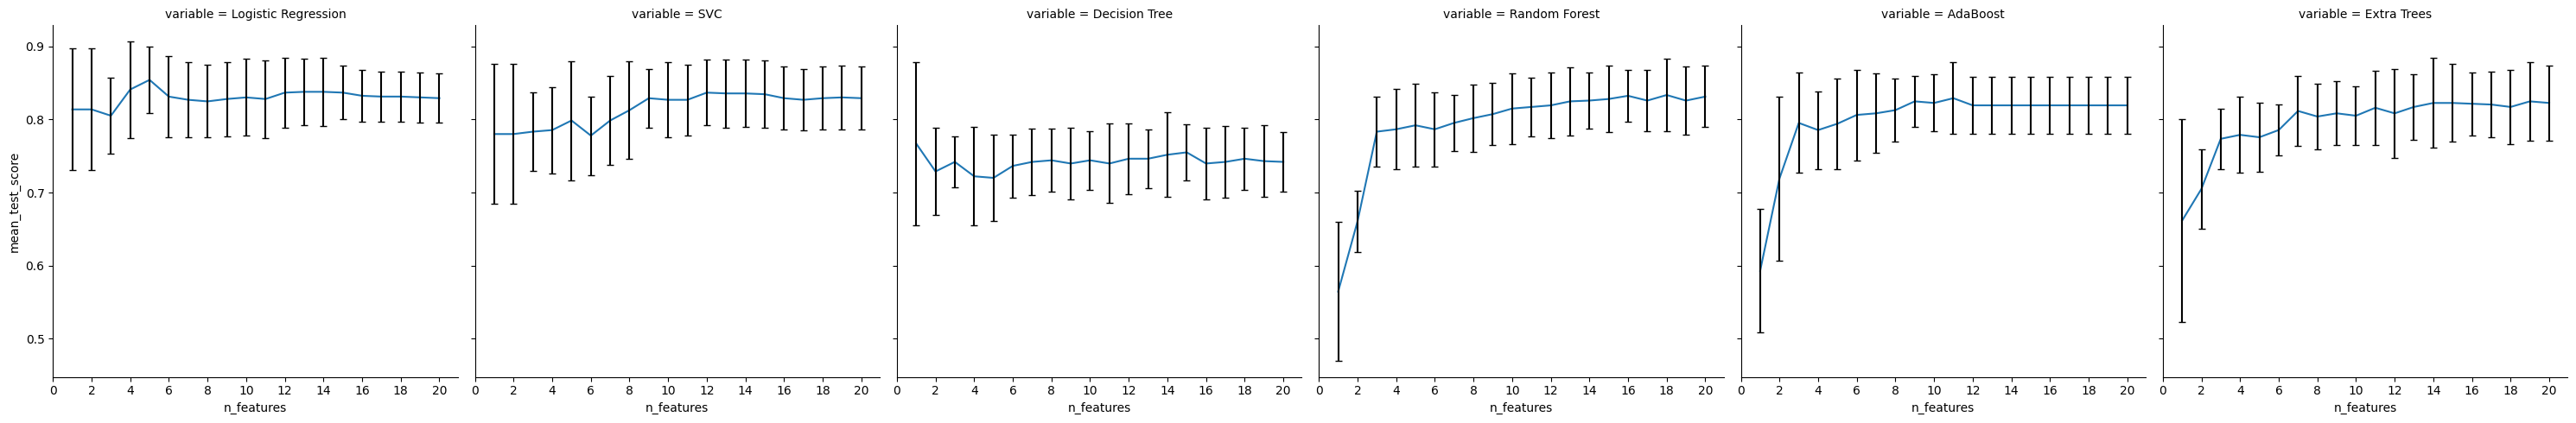

In [ ]:
# dictionary of classifiers
classifiers = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=STATE),
        "optimal_features": [],
        "tree-based": False
        },
    "SVC": {
        "model": SVC(kernel='linear', random_state=STATE),
        "optimal_features": [],
        "tree-based": False
        },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=STATE),
        "optimal_features": [],
        "tree-based": True
        },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=STATE),
        "optimal_features": [],
        "tree-based": True
        },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=STATE),
        "optimal_features": [],
        "tree-based": True
        },
    "Extra Trees": {
        "model": ExtraTreesClassifier(random_state=STATE),
        "optimal_features": [],
        "tree-based": True
        }
    }

# lists for plots
means = []
st_devs = []
feature_importance = []

# total number of features
print(f"Total number of features: {x.shape[1]}\n")

# run recursive feature elimination with cross validation
for name, classifier in classifiers.items():
    print(f"Running {name} ...")
    RFECV_selector = RFECV(classifier['model'], step=1, cv=5, scoring='accuracy', min_features_to_select=1, n_jobs=-1)
    RFECV_selector.fit(x, label)
    print(f"Optimal number of features: {RFECV_selector.n_features_}")

    for i in range(len(RFECV_selector.ranking_)):
        if (RFECV_selector.ranking_[i] == 1):
            classifier['optimal_features'].append(x.columns[i])

    print(f"Features to keep: {classifier['optimal_features']}\n")

    # save mean score for plot
    mean_score = pd.DataFrame(RFECV_selector.cv_results_, columns=['mean_test_score', 'n_features'])
    mean_score = mean_score.rename(columns={"mean_test_score" : name})
    mean_score = pd.melt(mean_score, id_vars=['n_features'])
    means.append(mean_score)

    # save std score for plot
    std_score = pd.DataFrame(RFECV_selector.cv_results_, columns=['std_test_score', 'n_features'])
    std_score = std_score.rename(columns={"std_test_score" : name})
    std_score = pd.melt(std_score, id_vars=['n_features'])
    st_devs.append(std_score)

    # get feature importance
    if classifier['tree-based'] == True:
        m = classifier['model'].fit(x, label)
        fi = pd.Series(m.feature_importances_, index=x.columns)
        fi.sort_values(ascending=False, inplace=True)
        feature_importance.append(fi)
    else:
        m = classifier['model'].fit(x, label)
        fi = pd.Series(m.coef_[0], index=x.columns)
        fi.sort_values(ascending=False, inplace=True)
        feature_importance.append(fi)


# merge means and st devs into one table
combined_means = pd.concat(means)
combined_means = combined_means.rename(columns={"value" : "mean_test_score"})
combined_st_devs = pd.concat(st_devs)
combined_st_devs = combined_st_devs.rename(columns={"value" : "std_test_score"})
results = pd.concat([combined_means, combined_st_devs], axis=1)
results = results.loc[:,~results.columns.duplicated()]

# plot RFECV results
with sns.color_palette():
    g = sns.relplot(data=results, x='n_features', y='mean_test_score', col='variable', kind='line', facet_kws=dict(sharex=False), legend='full')

# plot error bars
filtered = []
for name in classifiers:
    filtered.append(results[results['variable'] == name])

for i, ax in enumerate(plt.gcf().axes):
    ax.errorbar(filtered[i]['n_features'], filtered[i]['mean_test_score'], yerr=filtered[i]['std_test_score'], fmt='none', color='black', capsize=3)

    # # modify x-axis interval
    min_x = int(ax.get_xlim()[0])
    max_x = int(ax.get_xlim()[1])
    ax.set_xticks(range(min_x, max_x + 1, 2))
    ax.set_xticklabels(range(min_x, max_x + 1, 2))

plt.show()

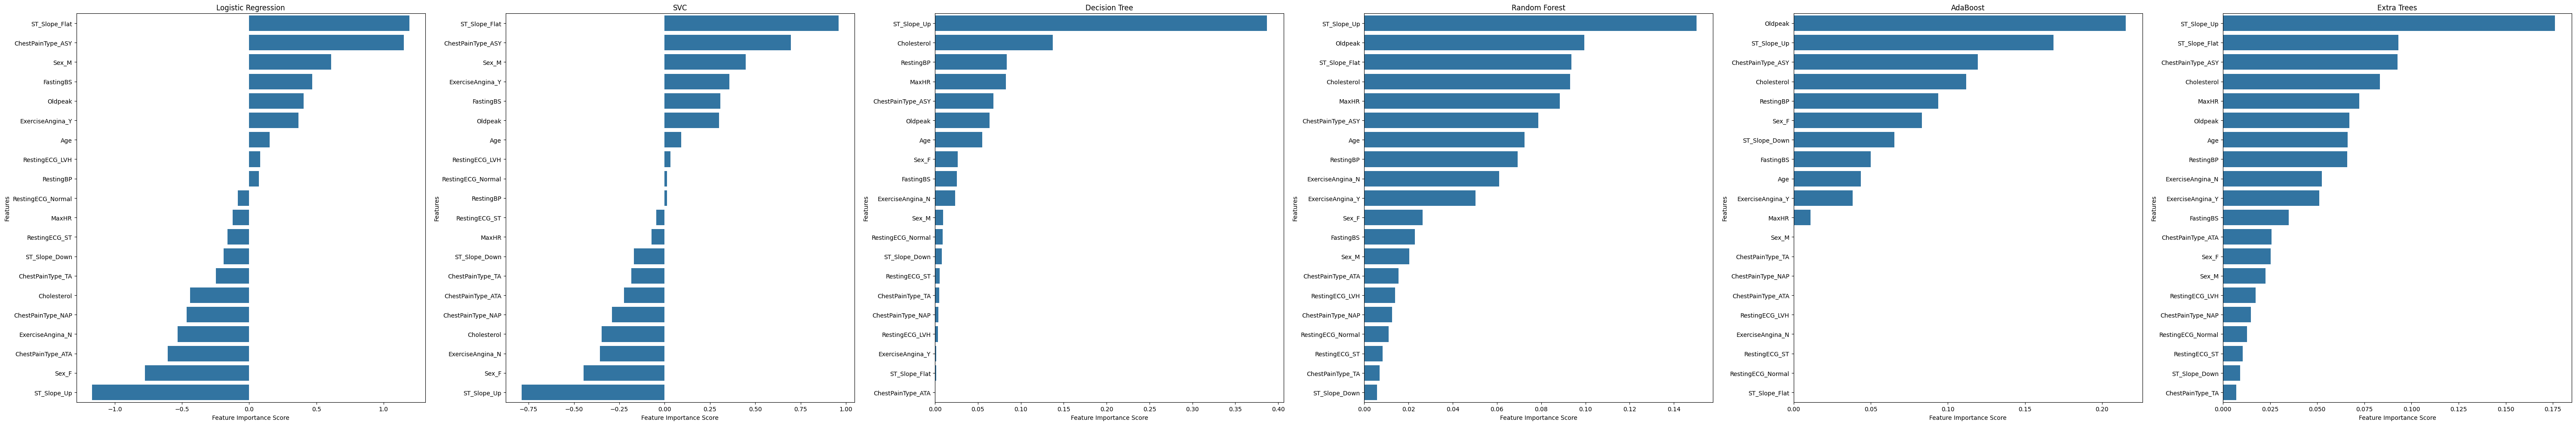

In [ ]:
# plot feature importance

# single figure with multiple subplots horizontally
num_models = len(classifiers)
model_names = list(classifiers.keys())

fig, axes = plt.subplots(1, num_models, figsize=(num_models * 10, 10))

for i, name in enumerate(model_names):
    sns.barplot(x=feature_importance[i], y=feature_importance[i].index, ax=axes[i])
    axes[i].set_xlabel('Feature Importance Score')
    axes[i].set_ylabel('Features')
    axes[i].set_title(f"{name}")

plt.tight_layout()
plt.show()

# # multiple individual figures
# for i, name in enumerate(model_names):
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=feature_importance[i], y=feature_importance[i].index)
#     plt.xlabel('Feature Importance Score')
#     plt.ylabel('Features')
#     plt.title(f"{name}")

# plt.show()

# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# "The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0."

---

# Models

Note: I tried training each generic model with all vs optimal number of features just to check if they really did perform better. Tested models scored between 78-88% accuracy. Difference between all vs optimal number of features was small (0-2%).

In [ ]:
# prints classification report and confusion matrix
def evaluate_model(y_test, y_pred):
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

In [ ]:
# returns dataset with only optimal features
def get_optimal_features(model_name, dataset):
  # get optimal features
  opt_features_model = classifiers[model_name]['optimal_features']
  return dataset[opt_features_model]

In [ ]:
# evaluates model with optimal vs all features
def optimal_vs_all_features(model_name):
  x_train_model = get_optimal_features(model_name, x_train)
  x_test_model = get_optimal_features(model_name, x_test)

  # train with optimal features
  opt_model = classifiers[model_name]['model']
  opt_model.fit(x_train_model, y_train)

  opt_y_pred = opt_model.predict(x_test_model)
  print(f"----- {model_name} [{len(classifiers[model_name]['optimal_features'])} features] -----")
  evaluate_model(y_test, opt_y_pred)

  # train with all features
  model = classifiers[model_name]['model']
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  print(f"\n----- {model_name} [all features] -----")
  evaluate_model(y_test, y_pred)


## Logistic Regression

In [ ]:
optimal_vs_all_features('Logistic Regression')

----- Logistic Regression [5 features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       123
           1       0.87      0.89      0.88       153

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

Confusion Matrix:
[[103  20]
 [ 17 136]]

----- Logistic Regression [all features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       123
           1       0.88      0.92      0.90       153

    accuracy                           0.88       276
   macro avg       0.89      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Confusion Matrix:
[[103  20]
 [ 12 141]]


## SVC

In [ ]:
optimal_vs_all_features('SVC')

----- SVC [12 features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       123
           1       0.88      0.92      0.90       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Confusion Matrix:
[[104  19]
 [ 13 140]]

----- SVC [all features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       123
           1       0.87      0.91      0.89       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

Confusion Matrix:
[[102  21]
 [ 14 139]]


## Decision Tree

In [ ]:
optimal_vs_all_features('Decision Tree')

----- Decision Tree [1 features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       123
           1       0.83      0.82      0.82       153

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276

Confusion Matrix:
[[ 97  26]
 [ 28 125]]

----- Decision Tree [all features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       123
           1       0.86      0.83      0.85       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

Confusion Matrix:
[[103  20]
 [ 26 127]]


## Random Forest

In [ ]:
optimal_vs_all_features('Random Forest')

----- Random Forest [18 features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       123
           1       0.89      0.92      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

Confusion Matrix:
[[105  18]
 [ 12 141]]

----- Random Forest [all features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       123
           1       0.90      0.93      0.91       153

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

Confusion Matrix:
[[107  16]
 [ 11 142]]


## AdaBoost

In [ ]:
optimal_vs_all_features('AdaBoost')

----- AdaBoost [11 features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       123
           1       0.90      0.88      0.89       153

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Confusion Matrix:
[[108  15]
 [ 19 134]]

----- AdaBoost [all features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       123
           1       0.89      0.88      0.89       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

Confusion Matrix:
[[106  17]
 [ 18 135]]


## Extra Trees

In [ ]:
optimal_vs_all_features('Extra Trees')

----- Extra Trees [19 features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       123
           1       0.90      0.92      0.91       153

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

Confusion Matrix:
[[108  15]
 [ 12 141]]

----- Extra Trees [all features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       123
           1       0.89      0.92      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.88      0.89       276
weighted avg       0.89      0.89      0.89       276

Confusion Matrix:
[[105  18]
 [ 13 140]]


## K-Nearest Neighbours

best testing accuracy: 0.9058 (k=7)



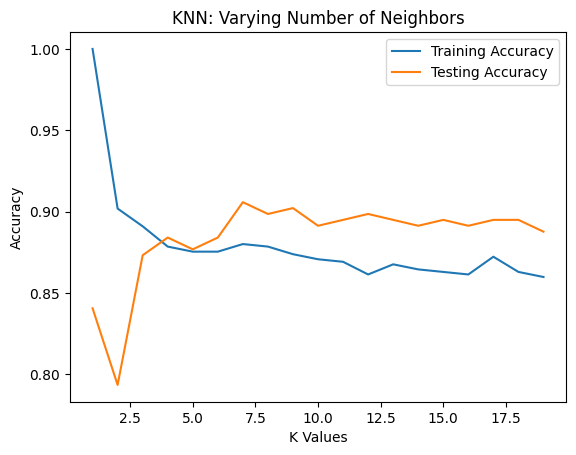

In [ ]:
# https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-k-nearest-neighbors-algorithm-exercise-8.php

train_score = []
test_score = []
k_values = np.arange(1, 20)
best_test_score = 0
best_k = 0

for k in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)

  # knn_y_pred = knn.predict(x_test)
  # print(f"----- K-Nearest Neighbours [k = {k}] -----")
  # evaluate_model(y_test, knn_y_pred)

  train_score.append(knn.score(x_train, y_train))
  test_score.append(knn.score(x_test, y_test))

  if (test_score[k-1] > best_test_score):
    best_test_score = test_score[k-1]
    best_k = k

print(f'best testing accuracy: {best_test_score:.4f} (k={best_k})\n')

plt.title('KNN: Varying Number of Neighbors')
plt.plot(k_values, train_score, label = 'Training Accuracy')
plt.plot(k_values, test_score, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()


## Multilayer Perceptron

In [ ]:
mlp = MLPClassifier(random_state=STATE)
mlp.fit(x_train, y_train)

mlp_y_pred = mlp.predict(x_test)
print(f"----- Multilayer Perceptron [all features] -----")
evaluate_model(y_test, mlp_y_pred)

----- Multilayer Perceptron [all features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       123
           1       0.87      0.90      0.89       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

Confusion Matrix:
[[103  20]
 [ 15 138]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Autoencoder

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(20, 1024),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(1024, 128),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(128, 10),

        )

        self.decoder = nn.Sequential(
            nn.ReLU(), # or nn.Sigmoid()
            nn.Linear(10, 15),
            nn.ReLU(),
            nn.Linear(15, 20),
        )

    def forward(self, x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x

    def get_encoded_features(self, x):
      x = self.encoder(x)
      return x


In [ ]:
x_train_tensor = torch.tensor(np.array(x_train).reshape(x_train.shape[0], 1, x_train.shape[1]), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

x_test_tensor = torch.tensor(np.array(x_test).reshape(x_test.shape[0], 1, x_test.shape[1]), dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32).view(-1, 1)

print(f"x_train shape: {x_train_tensor.shape}")
print(f"y_train shape: {y_train_tensor.shape}")

print(f"x_test shape: {x_test_tensor.shape}")
print(f"y_test shape: {y_test_tensor.shape}")

x_train shape: torch.Size([642, 1, 20])
y_train shape: torch.Size([642, 1])
x_test shape: torch.Size([276, 1, 20])
y_test shape: torch.Size([276, 1])


In [ ]:
torch.manual_seed(42)

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    # train model
    model.train()

    running_train_loss = 0.0
    total_train_batches = 0

    # Split the training data into batches
    for i in range(0, x_train_tensor.size(0), batch_size):
        x_train_batch = x_train_tensor[i:i+batch_size]

        # add noise to data
        factor = 0.1
        x_train_batch_noise = x_train_batch + factor * torch.randn_like(x_train_batch)

        optimizer.zero_grad()
        outputs = model(x_train_batch_noise)
        loss = criterion(outputs, x_train_batch_noise)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        total_train_batches += 1

    avg_train_loss = running_train_loss / total_train_batches

    # test model
    model.eval()
    running_test_loss = 0.0
    total_test_batches = 0

    with torch.no_grad():
      for i in range(0, x_test_tensor.size(0), batch_size):
        x_test_batch = x_test_tensor[i:i+batch_size]

        outputs = model(x_test_batch)
        loss = criterion(outputs, x_test_batch)

        running_test_loss += loss.item()
        total_test_batches += 1

    avg_test_loss = running_test_loss / total_test_batches

    print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f}')

Epoch [1/100] Train Loss: 0.4872 | Test Loss: 0.4233
Epoch [2/100] Train Loss: 0.3862 | Test Loss: 0.3538
Epoch [3/100] Train Loss: 0.3311 | Test Loss: 0.3104
Epoch [4/100] Train Loss: 0.2972 | Test Loss: 0.2779
Epoch [5/100] Train Loss: 0.2720 | Test Loss: 0.2527
Epoch [6/100] Train Loss: 0.2528 | Test Loss: 0.2269
Epoch [7/100] Train Loss: 0.2291 | Test Loss: 0.2037
Epoch [8/100] Train Loss: 0.2082 | Test Loss: 0.1856
Epoch [9/100] Train Loss: 0.1913 | Test Loss: 0.1695
Epoch [10/100] Train Loss: 0.1749 | Test Loss: 0.1581
Epoch [11/100] Train Loss: 0.1630 | Test Loss: 0.1471
Epoch [12/100] Train Loss: 0.1523 | Test Loss: 0.1398
Epoch [13/100] Train Loss: 0.1453 | Test Loss: 0.1324
Epoch [14/100] Train Loss: 0.1392 | Test Loss: 0.1284
Epoch [15/100] Train Loss: 0.1372 | Test Loss: 0.1239
Epoch [16/100] Train Loss: 0.1324 | Test Loss: 0.1198
Epoch [17/100] Train Loss: 0.1293 | Test Loss: 0.1183
Epoch [18/100] Train Loss: 0.1266 | Test Loss: 0.1137
Epoch [19/100] Train Loss: 0.1253 | T

In [ ]:
x_encoded_features_train = []
x_encoded_features_test = []

for x in x_train_tensor:
  coded = model.get_encoded_features(x)
  x_encoded_features_train.append(coded.detach().numpy())

for x in x_test_tensor:
  coded = model.get_encoded_features(x)
  x_encoded_features_test.append(coded.detach().numpy())

x_encoded_features_train = np.array(x_encoded_features_train)
x_encoded_features_test = np.array(x_encoded_features_test)

x_encoded_features_train = x_encoded_features_train.squeeze(1)
x_encoded_features_test = x_encoded_features_test.squeeze(1)

print(x_encoded_features_train.shape)

(642, 10)


In [ ]:
# evaluates model with encoded features
def experiment_encoded(model_name):
  # train with all features
  model = classifiers[model_name]['model']
  model.fit(x_encoded_features_train, y_train)

  y_pred = model.predict(x_encoded_features_test)
  print(f"\n----- {model_name} [encoded features] -----")
  evaluate_model(y_test, y_pred)

### Logistic Regression + Autoencoder Features

In [ ]:
experiment_encoded('Logistic Regression')


----- Logistic Regression [encoded features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       123
           1       0.92      0.92      0.92       153

    accuracy                           0.91       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.91      0.91      0.91       276

Confusion Matrix:
[[110  13]
 [ 13 140]]


### SVC + Autoencoder Features

In [ ]:
experiment_encoded('SVC')


----- SVC [encoded features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       123
           1       0.91      0.93      0.92       153

    accuracy                           0.91       276
   macro avg       0.91      0.91      0.91       276
weighted avg       0.91      0.91      0.91       276

Confusion Matrix:
[[108  15]
 [ 10 143]]


### Decision Tree + Autoencoder Features

In [ ]:
experiment_encoded('Decision Tree')


----- Decision Tree [encoded features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       123
           1       0.78      0.80      0.79       153

    accuracy                           0.76       276
   macro avg       0.76      0.76      0.76       276
weighted avg       0.76      0.76      0.76       276

Confusion Matrix:
[[ 88  35]
 [ 31 122]]


### Random Forest + Autoencoder Features

In [ ]:
experiment_encoded('Random Forest')


----- Random Forest [encoded features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       123
           1       0.88      0.90      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Confusion Matrix:
[[105  18]
 [ 15 138]]


### AdaBoost + Autoencoder Features

In [ ]:
experiment_encoded('AdaBoost')


----- AdaBoost [encoded features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       123
           1       0.85      0.87      0.86       153

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

Confusion Matrix:
[[ 99  24]
 [ 20 133]]


### Extra Trees + Autoencoder Features

In [ ]:
experiment_encoded('Extra Trees')


----- Extra Trees [encoded features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       123
           1       0.92      0.92      0.92       153

    accuracy                           0.91       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.91      0.91      0.91       276

Confusion Matrix:
[[110  13]
 [ 13 140]]


### KNN + Autoencoder Features

best testing accuracy: 0.9058 (k=32)



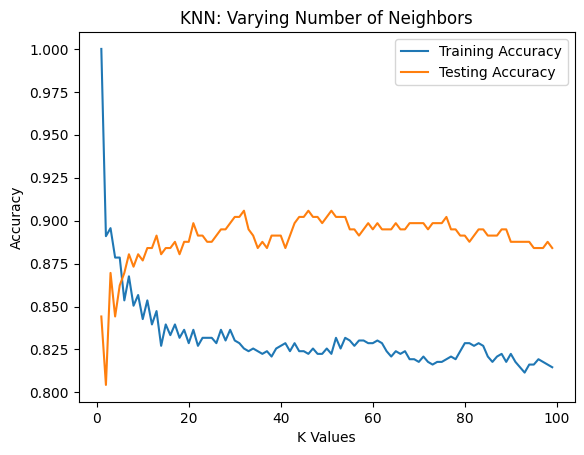

In [ ]:
# train with encoded features
# https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-k-nearest-neighbors-algorithm-exercise-8.php

train_score = []
test_score = []
k_values = np.arange(1, 100)
best_test_score = 0
best_k = 0

for k in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_encoded_features_train, y_train)

  # knn_y_pred = knn.predict(x_test)
  # print(f"----- K-Nearest Neighbours [k = {k}] -----")
  # evaluate_model(y_test, knn_y_pred)

  train_score.append(knn.score(x_encoded_features_train, y_train))
  test_score.append(knn.score(x_encoded_features_test, y_test))

  if (test_score[k-1] > best_test_score):
    best_test_score = test_score[k-1]
    best_k = k

print(f'best testing accuracy: {best_test_score:.4f} (k={best_k})\n')

plt.title('KNN: Varying Number of Neighbors')
plt.plot(k_values, train_score, label = 'Training Accuracy')
plt.plot(k_values, test_score, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

### MLP + Autoencoder Features

In [ ]:
mlp = MLPClassifier(random_state=STATE)
mlp.fit(x_encoded_features_train, y_train)

mlp_y_pred = mlp.predict(x_encoded_features_test)
print(f"----- Multilayer Perceptron [encoded features] -----")
evaluate_model(y_test, mlp_y_pred)

----- Multilayer Perceptron [encoded features] -----
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       123
           1       0.91      0.90      0.91       153

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

Confusion Matrix:
[[110  13]
 [ 15 138]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Hyperparameter Tuning

## RandomSearch with optimal features

In [ ]:
# define models + parameters
models = {
    "LogisticRegression": {
        "model": LogisticRegression(random_state=STATE, max_iter=1000),
        "params": {
            'C': uniform(0.1, 10),
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'lbfgs']
        },
        "x_train": get_optimal_features('Logistic Regression', x_train),
        "x_test": get_optimal_features('Logistic Regression', x_test)
    },
    "SVM": {
        "model": SVC(random_state=STATE),
        "params": {
            'C': uniform(0.1, 10),
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        },
        "x_train": get_optimal_features('SVC', x_train),
        "x_test": get_optimal_features('SVC', x_test)
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=STATE),
        "params": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None] + list(randint(5, 30).rvs(10)),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 20)
        },
        "x_train": get_optimal_features('Decision Tree', x_train),
        "x_test": get_optimal_features('Decision Tree', x_test)
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=STATE),
        "params": {
            'n_estimators': randint(100, 500),
            'max_depth': [None] + list(randint(5, 30).rvs(10)),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 20),
            'bootstrap': [True, False],
            'criterion': ['gini', 'entropy']
        },
        "x_train": get_optimal_features('Random Forest', x_train),
        "x_test": get_optimal_features('Random Forest', x_test)
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=STATE),
        "params": {
            'n_estimators': randint(50, 200),
            'learning_rate': uniform(0.01, 1)
        },
        "x_train": get_optimal_features('AdaBoost', x_train),
        "x_test": get_optimal_features('AdaBoost', x_test)
    },
    "ExtraTrees": {
        "model": ExtraTreesClassifier(random_state=STATE),
        "params": {
            'n_estimators': randint(100, 500),
            'max_depth': [None] + list(randint(5, 30).rvs(10)),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 20),
            'bootstrap': [True, False]
        },
        "x_train": get_optimal_features('Extra Trees', x_train),
        "x_test": get_optimal_features('Extra Trees', x_test)
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': randint(3, 50),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        },
        "x_train": x_train,
        "x_test": x_test
    },
    "MultilayerPerceptron": {
        "model": MLPClassifier(random_state=STATE, max_iter=1000),
        "params": {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'alpha': uniform(0.0001, 0.01)
        },
        "x_train": x_train,
        "x_test": x_test
    }
}

# train + evaluate models using random search
results = {}
for name, config in models.items():
    print(f"Training {name}...")

    # initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=config["model"],
        param_distributions=config["params"],
        n_iter=10,  # number of parameter settings sampled
        cv=5,       # cross-validation folds
        scoring='accuracy',
        n_jobs=-1,
        random_state=STATE,
        verbose=1
    )

    # fit the model
    random_search.fit(config["x_train"], y_train)

    # evaluate the best model
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(config["x_test"])
    confusion = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Best Parameters": random_search.best_params_,
        "Accuracy": random_search.best_score_,
        "Confusion Matrix": confusion,
        "Predictions": y_pred
    }

print("\n=== Results ===")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(classification_report(y_test, result['Predictions'], labels=[0, 1], digits=4))
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")

Training LogisticRegression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training DecisionTree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training AdaBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training ExtraTrees...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training KNN...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training MultilayerPerceptron...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

=== Results ===

LogisticRegression:
Best Parameters: {'C': np.float64(0.30584494295802445), 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0     0.8583    0.8374    0.8477       123
           1     0.8718    0.8889    0.8803       153

    accuracy                

## Random Search + Autoencoder Features

In [ ]:
# define models + parameters
models = {
    "LogisticRegression": {
        "model": LogisticRegression(random_state=STATE, max_iter=1000),
        "params": {
            'C': uniform(0.1, 10),
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'lbfgs']
        },
        "x_train": x_encoded_features_train,
        "x_test": x_encoded_features_test
    },
    "SVM": {
        "model": SVC(random_state=STATE),
        "params": {
            'C': uniform(0.1, 10),
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        },
        "x_train": x_encoded_features_train,
        "x_test": x_encoded_features_test
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=STATE),
        "params": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None] + list(randint(5, 30).rvs(10)),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 20)
        },
        "x_train": x_encoded_features_train,
        "x_test": x_encoded_features_test
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=STATE),
        "params": {
            'n_estimators': randint(100, 500),
            'max_depth': [None] + list(randint(5, 30).rvs(10)),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 20),
            'bootstrap': [True, False],
            'criterion': ['gini', 'entropy']
        },
        "x_train": x_encoded_features_train,
        "x_test": x_encoded_features_test
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=STATE),
        "params": {
            'n_estimators': randint(50, 200),
            'learning_rate': uniform(0.01, 1)
        },
        "x_train": x_encoded_features_train,
        "x_test": x_encoded_features_test
    },
    "ExtraTrees": {
        "model": ExtraTreesClassifier(random_state=STATE),
        "params": {
            'n_estimators': randint(100, 500),
            'max_depth': [None] + list(randint(5, 30).rvs(10)),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 20),
            'bootstrap': [True, False]
        },
        "x_train": x_encoded_features_train,
        "x_test": x_encoded_features_test
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': randint(3, 50),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        },
        "x_train": x_encoded_features_train,
        "x_test": x_encoded_features_test
    },
    "MultilayerPerceptron": {
        "model": MLPClassifier(random_state=STATE, max_iter=1000),
        "params": {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'alpha': uniform(0.0001, 0.01)
        },
        "x_train": x_encoded_features_train,
        "x_test": x_encoded_features_test
    }
}

# train + evaluate models using random search
results = {}
for name, config in models.items():
    print(f"Training {name}...")

    # initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=config["model"],
        param_distributions=config["params"],
        n_iter=10,  # number of parameter settings sampled
        cv=5,       # cross-validation folds
        scoring='accuracy',
        n_jobs=-1,
        random_state=STATE,
        verbose=1
    )

    # fit the model
    random_search.fit(config["x_train"], y_train)

    # evaluate the best model
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(config["x_test"])
    confusion = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Best Parameters": random_search.best_params_,
        "Accuracy": random_search.best_score_,
        "Confusion Matrix": confusion,
        "Predictions": y_pred
    }

print("\n=== Results ===")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(classification_report(y_test, result['Predictions'], labels=[0, 1], digits=4))
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")

Training LogisticRegression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training DecisionTree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training AdaBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training ExtraTrees...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training KNN...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training MultilayerPerceptron...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

=== Results ===

LogisticRegression:
Best Parameters: {'C': np.float64(0.30584494295802445), 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0     0.8943    0.8943    0.8943       123
           1     0.9150    0.9150    0.9150       153

    accuracy                